# Let's answer some questions about our spotify

In [392]:
#import necessary libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#for auth
import os
from dotenv import load_dotenv

#for spotify api
import spotipy
from spotipy.oauth2 import SpotifyOAuth

In [393]:
#get credentials from .env
load_dotenv()

#set up spotipy
client_id=os.getenv('SPOTIPY_CLIENT_ID')
client_secret=os.getenv('SPOTIPY_CLIENT_SECRET')
redirect_uri=os.getenv('SPOTIPY_REDIRECT_URI')

scope='user-top-read'

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                               client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                                scope=scope))

# First Question

What percenatge of my top songs are taken up by one artist? How much of a fanboy am I? I will be looking at my top tracks of the last year (time_range = long_term). If you want to change this to the last 6 months or last month, you can change the time_range to medium_term or short_term.

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,351946,True,{'isrc': 'USUM71027277'},{'spotify': 'https://open.spotify.com/track/1U...,https://api.spotify.com/v1/tracks/1UGD3lW3tDmg...,1UGD3lW3tDmgZfAVDh6w7r,False,Devil In A New Dress,74,https://p.scdn.co/mp3-preview/27da2905d952787d...,8,track,spotify:track:1UGD3lW3tDmgZfAVDh6w7r
1,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,273173,False,{'isrc': 'USRC10301821'},{'spotify': 'https://open.spotify.com/track/7j...,https://api.spotify.com/v1/tracks/7j74lucZ59vq...,7j74lucZ59vqN67Ipe2ZcY,False,Maneater,80,https://p.scdn.co/mp3-preview/d689e007e59681c1...,1,track,spotify:track:7j74lucZ59vqN67Ipe2ZcY
2,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,182346,False,{'isrc': 'USUM72212470'},{'spotify': 'https://open.spotify.com/track/0m...,https://api.spotify.com/v1/tracks/0mflMxspEfB0...,0mflMxspEfB0VbI1kyLiAv,False,Stick Season,88,https://p.scdn.co/mp3-preview/0495eca339f32d0a...,2,track,spotify:track:0mflMxspEfB0VbI1kyLiAv
3,"{'album_type': 'COMPILATION', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,187226,False,{'isrc': 'USRH10723036'},{'spotify': 'https://open.spotify.com/track/4d...,https://api.spotify.com/v1/tracks/4dt6XKr0xKdP...,4dt6XKr0xKdPzjFhwB8dBm,False,That's Life - 2008 Remastered,60,https://p.scdn.co/mp3-preview/245e39d047420821...,15,track,spotify:track:4dt6XKr0xKdPzjFhwB8dBm
4,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,77374,True,{'isrc': 'USUYG1242150'},{'spotify': 'https://open.spotify.com/track/6d...,https://api.spotify.com/v1/tracks/6dPjRptilDo0...,6dPjRptilDo0E3dLWm88QC,False,Make It,62,https://p.scdn.co/mp3-preview/d0eb9addc6783c23...,1,track,spotify:track:6dPjRptilDo0E3dLWm88QC
5,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, BO, BR, BG, CA, CL, CO, CR, CY, CZ, DO, E...",1,260000,True,{'isrc': 'USPO19250006'},{'spotify': 'https://open.spotify.com/track/2q...,https://api.spotify.com/v1/tracks/2qOm7ukLyHUX...,2qOm7ukLyHUXWyR4ZWLwxA,False,It Was A Good Day,77,https://p.scdn.co/mp3-preview/ea4eb0210dd50f7b...,7,track,spotify:track:2qOm7ukLyHUXWyR4ZWLwxA
6,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,370866,False,{'isrc': 'GBAAA9000090'},{'spotify': 'https://open.spotify.com/track/0D...,https://api.spotify.com/v1/tracks/0DnGfA1r8pAs...,0DnGfA1r8pAssJCuq4ojla,False,Still Got The Blues,62,https://p.scdn.co/mp3-preview/37671e4a4721c71c...,4,track,spotify:track:0DnGfA1r8pAssJCuq4ojla
7,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,391376,False,{'isrc': 'USEE11300353'},{'spotify': 'https://open.spotify.com/track/40...,https://api.spotify.com/v1/tracks/40riOy7x9W7G...,40riOy7x9W7GXjyGp4pjAv,False,Hotel California - 2013 Remaster,80,https://p.scdn.co/mp3-preview/6fedc11d0f55bef1...,1,track,spotify:track:40riOy7x9W7GXjyGp4pjAv
8,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,339000,False,{'isrc': 'USSM17300504'},{'spotify': 'https://open.spotify.com/track/70...,https://api.spotify.com/v1/tracks/70C4NyhjD5OZ...,70C4NyhjD5O

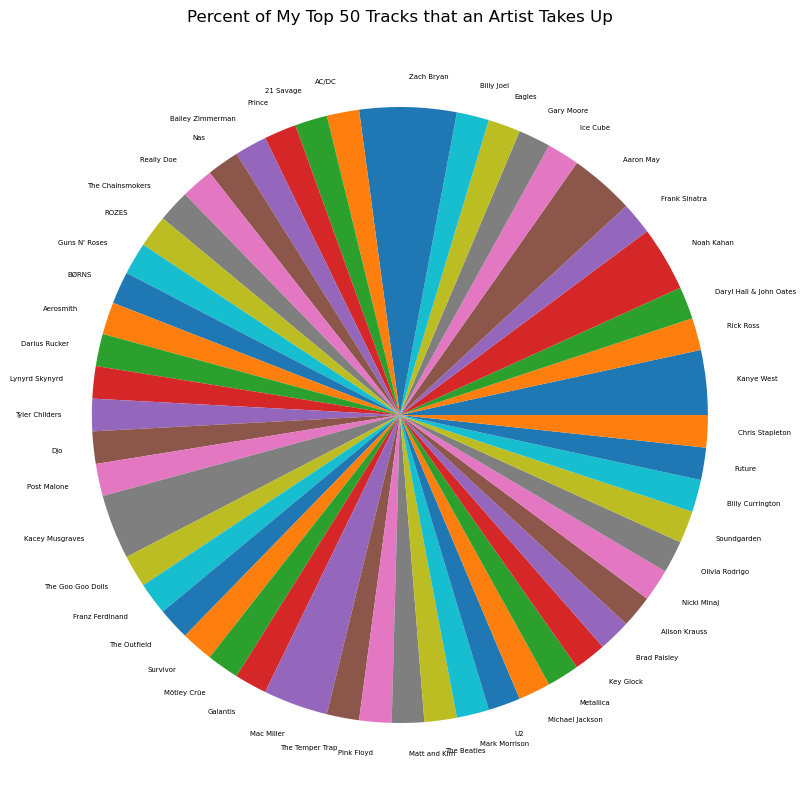

In [394]:

#
top_tracks_last_year = pd.DataFrame(sp.current_user_top_tracks(limit=50, time_range='long_term')['items'])

#create a series of the 'artists' field  from the top tracks dataframe
all_artists = top_tracks_last_year['artists']

#create a dictionary to store and keep track of # of artist appearances
artist_dict = {}

#count how many times an artist appears in my top 50 tracks over the last year
for song_artists in all_artists:
    for artist in song_artists:
        if artist['name'] not in artist_dict.keys():
            artist_dict[artist['name']] = 1
        else:
            artist_dict[artist['name']] += 1
    
#transform dict to series to plot it
artist_df = pd.DataFrame(artist_dict.items(), columns=['name', 'count']).set_index(['name'])

#add percentage column
artist_df['percentage'] = round(artist_df / artist_df.sum() * 100, 1)

#plot pie chart of percentages
artist_df['percentage'].plot(kind='pie', figsize=(10,10), ylabel='', title='Percent of My Top 50 Tracks that an Artist Takes Up',
                             fontsize=5)

top_tracks_last_year

# This dataframe is kinda messy. Lets clean it up

In [395]:
#set name of song to index
top_tracks_last_year = top_tracks_last_year.set_index('name')

#list artists in artist field
top_tracks_last_year['artists'] = top_tracks_last_year['artists'].apply(lambda x: [artist['name'] for artist in x])

#list album in albums field
top_tracks_last_year['album'] = top_tracks_last_year['album'].apply(lambda x: x['name'])

#rid of certain columns
top_tracks_last_year = top_tracks_last_year.drop(columns=['available_markets','disc_number','external_ids',
                                                          'external_urls','href','is_local','preview_url','type','id'])

#change duration_ms to actual time
def ms_to_minutes(ms):
    min = math.floor(ms / 60000)
    sec = math.floor((ms / 60000 - math.floor(ms / 60000)) * 60)
    if sec >= 10:
        time = "%d:%d" % (min,sec)
    else:
        time = "%d:0%d" % (min,sec)
    return time

top_tracks_last_year['duration_ms'] = top_tracks_last_year['duration_ms'].apply(lambda ms: ms_to_minutes(ms=ms) )


#rename some columns
top_tracks_last_year = top_tracks_last_year.rename(columns={'duration_ms':'time'})
top_tracks_last_year.index.name = 'song'

top_tracks_last_year
 

,album,artists,time,explicit,popularity,track_number,uri
song,,,,,,,
Devil In A New Dress,My Beautiful Dark Twisted Fantasy,"[Kanye West, Rick Ross]",5:51,True,74,8,spotify:track:1UGD3lW3tDmgZfAVDh6w7r
Maneater,H2O,[Daryl Hall & John Oates],4:33,False,80,1,spotify:track:7j74lucZ59vqN67Ipe2ZcY
Stick Season,Stick Season,[Noah Kahan],3:02,False,88,2,spotify:track:0mflMxspEfB0VbI1kyLiAv
That's Life - 2008 Remastered,Nothing But The Best (2008 Remastered),[Frank Sinatra],3:07,False,60,15,spotify:track:4dt6XKr0xKdPzjFhwB8dBm
Make It,CHASE,[Aaron May],1:17,True,62,1,spotify:track:6dPjRptilDo0E3dLWm88QC
It Was A Good Day,The Predator,[Ice Cube],4:19,True,77,7,spotify:track:2qOm7ukLyHUXWyR4ZWLwxA
Still Got The Blues,Still Got The Blues,[Gary Moore],6:10,False,62,4,spotify:track:0DnGfA1r8pAssJCuq4ojla
Hotel California - 2013 Remaster,Hotel California (2013 Remaster),[Eagles],6:31,False,80,1,spotify:track:40riOy7x9W7GXjyGp4pjAv
Piano Man,Piano Man (Legacy Edition),[Billy Joel],5:39,False,73,2,spotify:track:70C4NyhjD5OZUMzvWZ3njJ


# Ok Second Question

Do I seem to like intro songs more than others? (First song on an album)

<Axes: title={'center': 'How often does a track number appear in my top 50'}, xlabel='Track Number', ylabel='Count'>

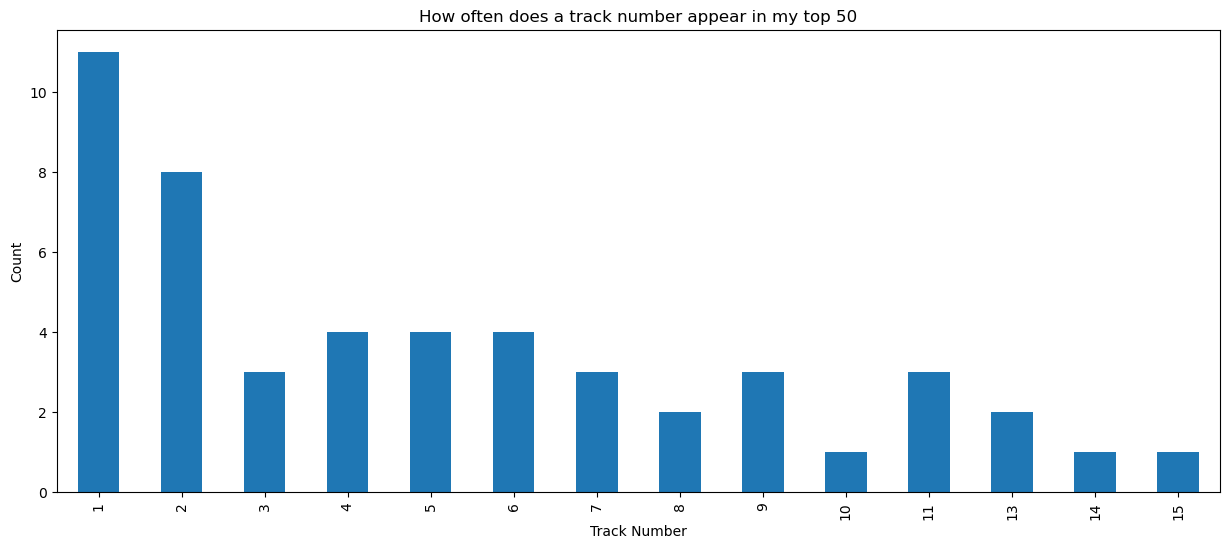

In [396]:
#create Series of # of times each track number shows up in my top tracks (sort by ascending track number)
track_number = top_tracks_last_year['track_number'].value_counts().sort_index()

#barplot these numbers
track_number.plot(kind='bar', figsize=(15,6), xlabel='Track Number',ylabel='Count', title='How often does a track number appear in my top 50')


# Small sample size but wow

This leads me to a new question. Do artists front load albums? Do they put all their best songs at the start of an album? I will try to find the answer to this question by using the popularity scores that sporify gives to songs. If I find a correlation, this also raises the question: are the artists actually front loading the albums or are fans influenced by the placement of a track on an album?

<Axes: title={'center': 'How often does a track number appear in top songs'}, xlabel='Track Number', ylabel='Count'>

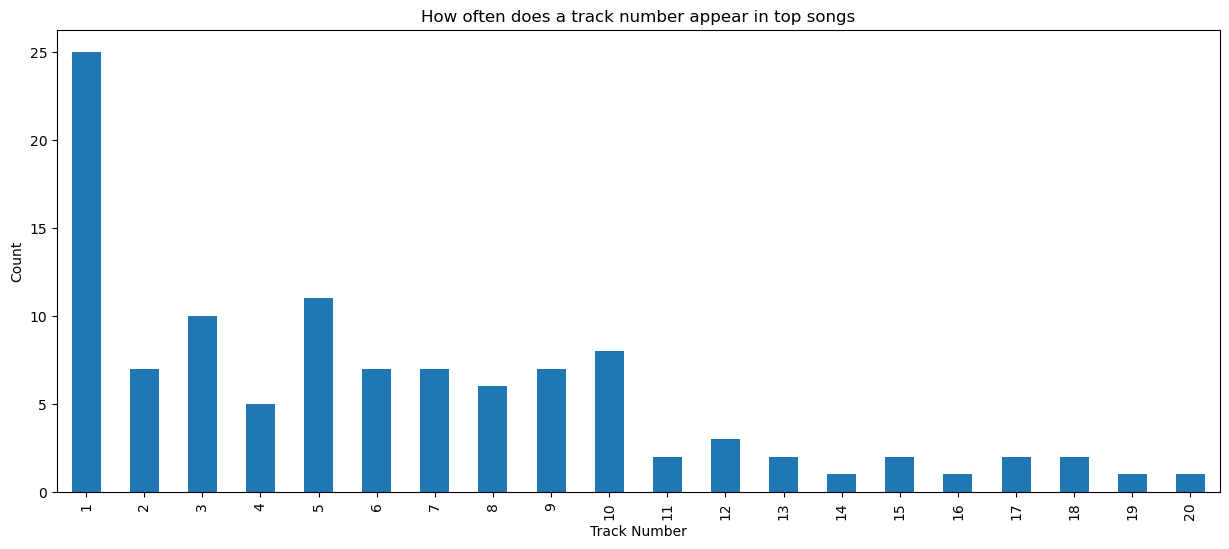

In [397]:
#lets look at the top ten artists (by monthly listeners) and their top songs
theweeknd_uri = 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'
tswift_uri = 'spotify:artist:06HL4z0CvFAxyc27GXpf02'
billie_uri = 'spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH'
postmalone_uri = 'spotify:artist:246dkjvS1zLTtiykXe5h60'
rihanna_uri = 'spotify:artist:5pKCCKE2ajJHZ9KAiaK11H'
eminem_uri = 'spotify:artist:7dGJo4pcD2V6oG8kP0tJRR'
ariana_uri = 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'
coldplay_uri = 'spotify:artist:4gzpq5DPGxSnKTe4SA8HAU'
sabrina_uri = 'spotify:artist:74KM79TiuVKeVCqs8QtB0B'
drake_uri = 'spotify:artist:3TVXtAsR1Inumwj472S9r4'

#have to add kendrick just cause
kendrick_uri = 'spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg'

#create uri list
uris = [theweeknd_uri,tswift_uri,billie_uri,postmalone_uri,rihanna_uri,eminem_uri,ariana_uri
        ,coldplay_uri,sabrina_uri,drake_uri,kendrick_uri]

#create data frame
dataframes = [pd.DataFrame(sp.artist_top_tracks(uri)) for uri in uris]

results = pd.concat(dataframes)

#add artist, popularity and track number column
results['artist'] = results['tracks'].apply(lambda x: x['artists'][0]['name'])
results['popularity'] = results['tracks'].apply(lambda x: x['popularity'])
results['track_number'] = results['tracks'].apply(lambda x: x['track_number'])

#now that we have popularity and track number, lets just set the index to the song name
results['tracks'] = results['tracks'].apply(lambda x: x['name'])
results = results.rename(columns={'tracks':'song'}).set_index('song')

track_number = results['track_number'].value_counts().sort_index()

track_number.plot(kind='bar', figsize=(15,6), xlabel='Track Number',ylabel='Count',title='How often does a track number appear in top songs')


<Axes: title={'center': 'Percentage of top songs by track number'}>

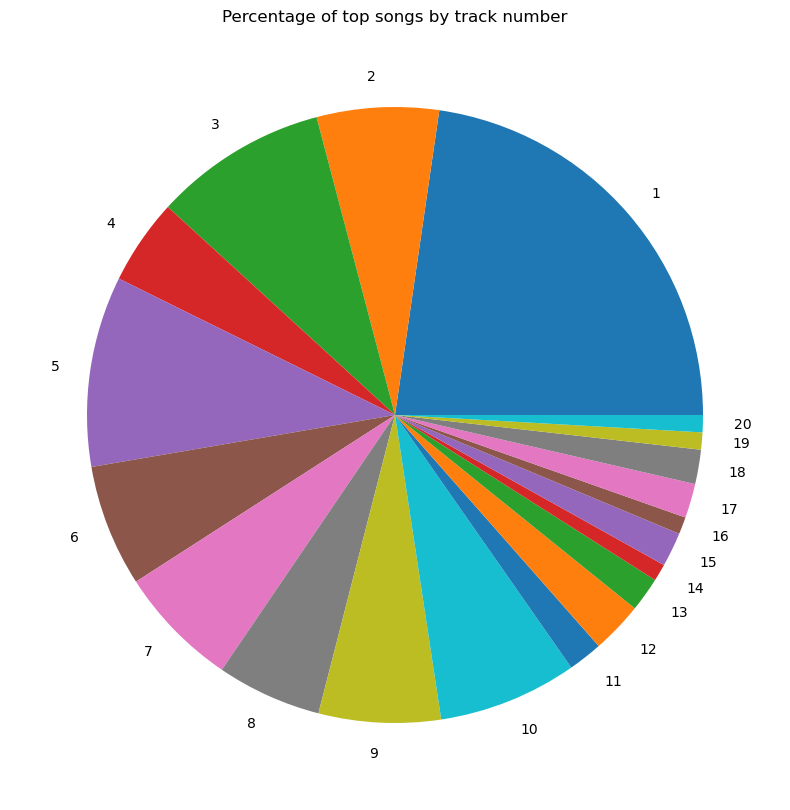

In [401]:
#create pie chart of percentages
track_number_percentage = round(track_number / track_number.sum() * 100, 1)

track_number_percentage.plot(kind='pie', figsize=(10,10), ylabel='', title='Percentage of top songs by track number')

# Seems we found a trend with intros to albums

Not necessarily top heavy because I believe the rest can be written off by lots of albums not going over ten songs, but we certainly found something witht the intro song being popular. Now let's look at popularity score to see if we see similar results or a difference.